# Assignment 3: Model selection and regularization
## BUS 20800: Big Data
## Due: 11:59 am on Apr 22, 2022

----

## Part I

## Problem 1. **In-Sample and Out-of-Sample Performance**

**1. Linear model**

Consider a linear regression model with $p$ parameters, fit by least squares to a set of training data $(x_1, y_1), . . . , (x_N, y_N)$ drawn at random from a population. Let $\hat{\beta}$ be the least squares estimate. Suppose we have
some test data $(\tilde{x}_1, \tilde{y}_1), . . . , (\tilde{x}_M, \tilde{y}_M)$ drawn at random from the same population as the training data. Set

$$L_{train}\ \ (\beta) = \frac{1}{N}\sum_{i=1}^N(y_i - \beta^TX_i)^2
$$
$$
L_{test}\ \ (\beta) = \frac{1}{M}\sum_{i = 1}^M(\tilde{y}_i-\beta^T\tilde{X}_i)^2
$$

Show that
$$
\mathbb{E}(L_{train}\ \ (\hat{\beta})) \leq \mathbb{E}(L_{test}\ \ (\hat{\beta}))
$$





**Answer** :

Here, $\hat{\beta}$ is the least squares estimator. Thus, for the training sample, the MSE with the least squares estimator must be less than or equal to the MSE with a random $\beta$ since the regression minimizes deviance.

$$\frac{1}{N}\sum_{i=1}^{N}(y_{i}-\hat{\beta}^{T}X_{i})^{2} \leq \frac{1}{N}\sum_{i=1}^{N}(y_{i}-\beta^{T}X_{i})^{2} $$

We can then take the expected value. Note that the value inside the summmation will be a constant. Summing this N times and dividing by N will just yield that same constant.

$$\mathbb{E}[\frac{1}{N}\sum_{i=1}^{N}(y_{i}-\hat{\beta}^{T}X_{i})^{2}] = \mathbb{E}[(y_{i}-\hat{\beta}^{T}X_{i})^{2}]$$

This implies that when $\hat{\beta}$ is the least squares estimator and $\beta$ is a random column vector

$$\mathbb{E}[(y_{i}-\hat{\beta}^{T}X_{i})^{2}] \leq \mathbb{E}[(y_{i}-\beta^{T}X_{i})^{2}] $$

This holds for any random vector $\beta$. Therefore, we can show that since the test data is not identical to the training data the following holds.

$$ \mathbb{E}[(y_{i}-\hat{\beta}^{T}X_{i})^{2}] \leq \mathbb{E}[(\tilde{y}_{i}-\hat{\beta}^{T}\tilde{X}_{i})^{2}]$$

By the same process of expectations symmetry we used to bypass the summation before, this is identical to

$$ \frac{1}{N}\sum_{i}^{N}\mathbb{E}[(y_{i}-\hat{\beta}^{T}X_{i})^{2}] \leq \frac{1}{M}\sum_{i}^{M}\mathbb{E}[(\tilde{y}_{i}-\hat{\beta}^{T}\tilde{X}_{i})^{2}]$$

$$\mathbb{E}(L_{train}\ \ (\hat{\beta})) \leq \mathbb{E}(L_{test}\ \ (\hat{\beta}))$$


## Problem 2. **Ridge Regression and Correlation Screening**

**1. Ridge and OLS**

Show that the ridge regression estimates can be obtained by OLS on an augmented data set. We augment the centered matrix $X$ with $p$ additional rows $\sqrt{\lambda}I$, and augment $y$ with $p$ zeros. By introducing artificial data with response value being zero, the fitting procedure is forced to shrink the coefficients toward zero. 

**Answer** :



The estimate of an OLS regression is usually

$$ \hat{\beta} = (X^{T}X)^{-1}X^{T}y $$

Now we have an augmented dataset such that now, $X^{T}X = X^{T}X + \lambda I$, and since we add p zeros to the column of y, it remains that $X^{T}y = X^{T}y$. The square root on lambda will drop out when we multiply $X^{T}$ by X.

$$\hat{\beta} = (X^{T}X + \lambda I)^{-1}X^{T}y $$

Given that $\lambda$ is positive, the term in parenthesis is essentially growing in magnitude. Inverting this matrix will therefore decrease the coefficient. 



**2. Analytical formula for Ridge**

Show that for the ridge problem

$$\hat{\beta}_{ridge} = argmin _{\beta}||Y-X\beta||^2_2 +\lambda ||\beta||_2^2
$$

has the closed form:

$$
\hat{\beta}_{ridge} = (X^TX+\lambda I_d)^{-1}X^TY
$$

where $I_d$ is the identity matrix.


**Answer**:



The cost function is 

$$ C = ||Y-X\beta||^2_2 +\lambda ||\beta||_2^2 $$

For any vector v, $||v||_{2}^{2} = v^{T}v$.

$$ C = (Y-X\beta)^{T}(Y-X\beta) + \lambda \beta^{T}\beta$$

$$ C = y^{T}y - \beta^{T}X^{T}Y - y^{T}X\beta + \beta^{T}X^{T}X\beta + \lambda \beta^{T}\beta$$

We then minimize this with respect to $\beta$. 

$$\frac{\partial C}{\partial \beta} = -2y^{T}X + 2X^{T}X\beta + 2\lambda\beta$$

Set equal to 0 and rearrange the first term. Since it is a scalar, we can change the order of the matricies and switch what is transposed.

$$ 0 = -2X^{T}Y + 2X^{T}X\beta + 2\lambda\beta$$

$$ X^{T}Y = (X^{T}X + \lambda I_{d})\beta$$

$$\hat{\beta}_{ridge} = (X^{T}X + \lambda I_{d})^{-1}X^{T}Y $$


**3. Ridge and Correlation Screening**

Consider a linear regression model $Y=X\beta+\varepsilon$, where $y$ is the $n × 1$ response vector, $X$ is the $n × p$ design matrix, $\beta$ is the $p × 1$ regression coefficient vector, and $\varepsilon$ is the $n×1$ random error vector with $E(\varepsilon) = 0$ and $Cov(ε) = \sigma^2 I_{d}$.

Assume each column of $X$ has zero mean and unit variance.

Use results of 2.2 to show that when $\lambda → \infty$, ridge regression outputs are exactly the correlations used in screening.



**Answer**:

When $\lambda→ \infty$, we know that the term $(X^{T}X + \lambda I_{d})^{-1}$ will go to 0. We know that typically, $X^{T}X$ is a correlation matrix of independent variables. 

To make this easier, we can multiply both sides of the ridge regression estimator by $\lambda$.

$$\lambda \hat{\beta} = \lambda (X^{T}X + \lambda I_{d})^{-1}X^{T}Y $$

Then, we take the limit as $\lambda → \infty$. Note that when we do this

$$ (X^{T}X + \lambda I_{d}) → \lambda $$

Lambda will end up dominating will $X^{T}X$, so the whole term within the parentheses approaches $\lambda I_{d}$

$$ \lambda \hat{\beta} = \lambda(\lambda I_{d})^{-1}X^{T}Y $$

$$\lambda \hat{\beta}  = X^{T}Y$$

Here, since there is unit variance, corr(X, Y) = $X^{T}Y$. The result is identical to screening correlations. 

-----

## Part II

In [2]:
# Setup codes

import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)

warnings.filterwarnings("ignore")

----

## Problem 3. **Best Subset, Forward Stepwise and Backward Stepwise Regression**



In this exercise, we simluate a linear regression problem, and compare selected features based on different methods.

### Part 1. Data Generating Process

Consider a linear regression problem $y = X^T\beta +\varepsilon$.  Suppose there are 300 observations on 16 standard Gaussian variables, with pairwise correlations all equal to 0.85. For the first 6 variables, the coefficients are drawn from a $N(0,0.4)$ distribution; the rests are 0. Therefore, the true DGP of $y$ only depends on the first 6 entires of $X$ variables. The noise follows $N(0,6.25)$.

In [3]:
# DGP, you don't need to modify any codes here.
N = 300
p = 16
rou = 0.85
num_signals = 6
sigma = np.ones((p,p)) * rou + (1-rou) * np.identity(p)
X = np.random.multivariate_normal(np.repeat(0,p), sigma, size = N)
X = pd.DataFrame(data = X)
beta = np.random.normal(0,0.4,num_signals).tolist()+ np.repeat(0,p-num_signals).tolist()
noise = np.random.normal(0,6.25, N)

y = X.dot(beta) +noise

### Part 2. Compare Three Methods



Suppose now we want to decide the best regression model with $k$ regressors, for each given $k$, where $k = 1,2,\cdots, p$, respectively. 

For best subset selection regression, how many models do you compare? What about forward stepwise and backward stepwise regressions?


**Answer**:

For best subset selection, there are $2^{k}$ models to compare. Forward stepwise compares $1+k(\frac{k+1}{2})$ models. Backwards stepwise regression compares the same amount as forwards stepwise. 


Now let's see which model is selected by these three methods for a given $k$ number of regressors, and compare their running time.

Please finish Best_subset_selection, Forward_stepwise_selection, Backward_stepwise_selection in Stepwise_simulation.py before you run the following cells. You don't need to modify any codes here.

In [4]:
from Stepwise_simulation import *

The following 3 methods will output the variables it selected with different numbers of regessors, respectively.

In [5]:
# Best Subset selection
# Please finish the codes in Best_subset_selection(X,y,p)
df_best,time_best = Best_subset_selection(X,y,p)

In [6]:
time_best

[0.12189102172851562,
 0.6084978580474854,
 2.3445448875427246,
 7.661938905715942,
 18.39305281639099,
 59.46533513069153,
 96.28587985038757,
 132.70085406303406,
 101.75167512893677,
 69.93012619018555,
 39.124666929244995,
 13.404912233352661,
 3.9054110050201416,
 0.9366767406463623,
 0.10143518447875977]

In [7]:
df_best

,numb_features,RSS,R_squared,features
0,1,10927.465002,0.025790,"(15,)"
1,2,10845.465222,0.033100,"(8, 15)"
2,3,10791.947200,0.037871,"(8, 13, 15)"
3,4,10770.106522,0.039818,"(8, 9, 13, 15)"
4,5,10744.127042,0.042135,"(2, 8, 10, 13, 15)"
5,6,10722.665691,0.044048,"(0, 2, 8, 10, 13, 15)"
6,7,10708.588351,0.045303,"(0, 2, 3, 8, 10, 13, 15)"
7,8,10692.040617,0.046778,"(0, 2, 3, 8, 9, 10, 13, 15)"
8,9,10679.552866,0.047892,"(0, 1, 2, 3, 8, 10, 11, 13, 15)"
9,10,10669.209560,0.048814,"(0, 1, 2, 3, 8, 9, 10, 11, 13, 15)"


In [8]:
# Forward Stepwise selection
# Please finish the codes in Forward_stepwise_selection(X,y,p)
df_forward, time_forward = Forward_stepwise_selection(X,y,p)

In [9]:
df_forward

,numb_features,RSS,R_squared,features
0,1,10927.465002,0.025790,[15]
1,2,10845.465222,0.033100,"[15, 8]"
2,3,10791.947200,0.037871,"[15, 8, 13]"
3,4,10770.106522,0.039818,"[15, 8, 13, 9]"
4,5,10756.147192,0.041063,"[15, 8, 13, 9, 2]"
5,6,10728.192370,0.043555,"[15, 8, 13, 9, 2, 10]"
6,7,10711.485677,0.045045,"[15, 8, 13, 9, 2, 10, 0]"
7,8,10692.040617,0.046778,"[15, 8, 13, 9, 2, 10, 0, 3]"
8,9,10680.986523,0.047764,"[15, 8, 13, 9, 2, 10, 0, 3, 11]"
9,10,10669.209560,0.048814,"[15, 8, 13, 9, 2, 10, 0, 3, 11, 1]"


In [10]:
# Backward Stepwise selection
# Please finish the codes in Backward_stepwise_selection(X,y,p)
df_backward, time_backward = Backward_stepwise_selection(X,y,p)

In [11]:
df_backward

,numb_features,RSS,R_squared,features
0,1,10644.827282,0.050987,[6]
1,2,10646.518524,0.050837,"[6, 7]"
2,3,10650.767016,0.050458,"[6, 7, 5]"
3,4,10655.209309,0.050062,"[6, 7, 5, 12]"
4,5,10659.890601,0.049644,"[6, 7, 5, 12, 4]"
5,6,10669.209560,0.048814,"[6, 7, 5, 12, 4, 14]"
6,7,10679.552866,0.047892,"[6, 7, 5, 12, 4, 14, 9]"
7,8,10693.056258,0.046688,"[6, 7, 5, 12, 4, 14, 9, 11]"
8,9,10708.588351,0.045303,"[6, 7, 5, 12, 4, 14, 9, 11, 1]"
9,10,10722.665691,0.044048,"[6, 7, 5, 12, 4, 14, 9, 11, 1, 3]"


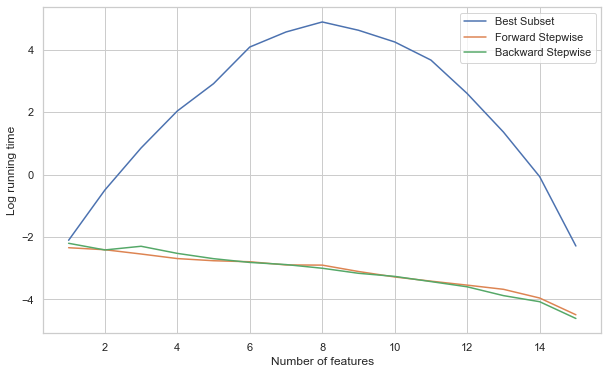

In [12]:
# Run this cell to visualize the running time. You don't need to modify any codes here.

running_time = pd.DataFrame({'Best Subset': np.log(time_best),'Forward Stepwise': np.log(time_forward),'Backward Stepwise': np.log(time_backward)})
running_time.index = range(1,16)

# Visualize the results
running_time.plot(figsize = (10,6))
plt.xlabel('Number of features')
plt.ylabel('Log running time')
plt.show()

Based on this plot and these output DataFrames, comment on what you find. 


**Answer**:
First for subset selection: We see that this is parabolic in the number of features. The reason for this is that the selection process goes through n choose 1, n choose 2, n choose 3, until n choose n. n choose 1 is equivalent to n choose n-1, and n choose 2 is equivalent to n choose n-2, etc. Note that in the code, n is denoted as p and we choose k. Therefore, we can observe the parabolic form. 
$$C(n,r) = \frac{n!}{(r!(n+r)!)}$$
For forward stepwise: We begin with an empty model and add in variables (features) one by one. As more features are added, there is less and less to analyze, therefore decreasing run time. 

For backward stepwise: We begin with full model (a model that contains all variables under consideration) and then remove the least significant variables (features) one by one. As more features are removed, there is once again less and less to analyze, decreasing run time.

From best subset selection, it looks like feature 15 is very important, followed by features 8, 13, and 9. This is confirmed by the forward stepwise process. The backward stepwise process shows that features 6, 7, and 5 are the least important.

-----

## Problem 4. Sparse Signal Recovery

In this exercise, we will generate a simulated linear regression problem and use Lasso to see if this method can recover the sparse signals.

### Part 1. Data Generating Process

In [151]:
# DGP, you don't need to modify any codes here

np.random.seed(50) # for stability in testing

n_samples, n_features = 50, 100
num_signal = 10
X = np.random.randn(n_samples, n_features)

# Construct the signals
idx = np.arange(n_features)

coef = 5 * np.random.randn(n_features)
inds = np.arange(n_features)

# Shuffle index and sparsify the signals
np.random.shuffle(inds)
coef[inds[num_signal:]] = 0

# Add noise
y = np.dot(X, coef) + 0.01 * np.random.normal(size=n_samples)

### Part 2. Fit Lasso for signal recovery

In [152]:
# Split data in training set and test set. You don't need to modify any codes here.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV, LassoLarsIC

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.4)


Please finish the following cell to fit Lasso, output a model named lasso, and calculate the OOS R^2: 



In [153]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso

##############################################################################
### TODO: Fit a lasso model here, and calculate the OOS R square           ###
##############################################################################

#standardize data
from sklearn.preprocessing import StandardScaler

#We choose not to scale the data, so this section is commented out

#Xscaler = StandardScaler().fit(X_train) 
#X_train_scaled = Xscaler.transform(X_train)
#X_test_scaled = Xscaler.transform(X_test)

#change dimensions on y
#y_train = y_train[:,np.newaxis]
#y_test = y_test[:,np.newaxis]

#yscaler = StandardScaler().fit(y_train) 
#y_train_scaled = yscaler.transform(y_train)
#y_test_scaled = yscaler.transform(y_test)

# find the best alpha for the lasso regression
model = LassoCV(cv=10, random_state = 0, max_iter=10000)
model.fit(X_train, y_train)

# Show best value of penalization chosen by CV
alpha_ = model.alpha_
print(alpha_)

#fit Lasso Regression
lasso_reg = Lasso(max_iter=10000)

lasso = lasso_reg.set_params(alpha=alpha_).fit(X_train, y_train)

#lasso_y_pred = yscaler.inverse_transform(lasso.predict(X_test_scaled))

lasso_y_pred = lasso.predict(X_test)

r2score = r2_score(y_test, lasso_y_pred)

#stdscale = np.std(X_train)

#lasso_coeff_fix = stdscale *lasso.coef_

print(r2score)
##############################################################################
#                               END OF YOUR CODE                             #
##############################################################################
#print(stdscale)

0.020495741788347736
0.940180337522041


Visualize and compare the results. You don't need to modify any codes here.

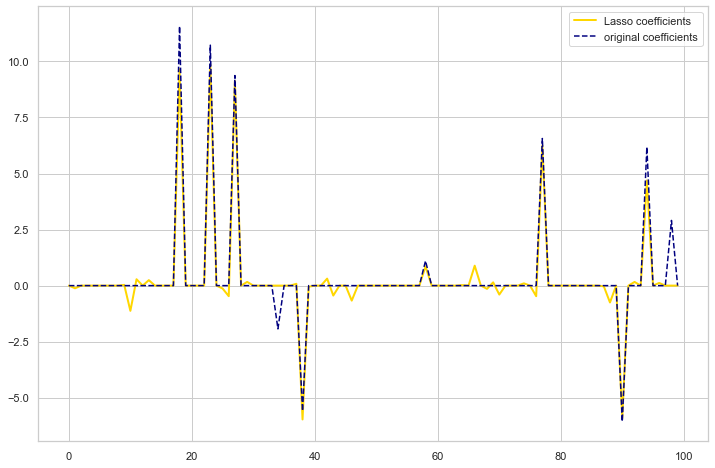

In [154]:
plt.figure(figsize = (12,8))
plt.plot(lasso.coef_, color='gold', linewidth=2, label='Lasso coefficients')
plt.plot(coef, '--', color='navy', label='original coefficients')
plt.legend(loc='best')

plt.show()

#post pictures tonight- nearly identical one and this one

----

## Problem 5. **Track S&P500 index**

**Background**: 

The S&P 500 Index, or Standard & Poor's 500 Index, is a market-capitalization-weighted index of 500 (approximately) leading publicly traded companies in the U.S. It is regarded as one of the best gauges of prominent American equities' performance, and by extension, that of the stock market overall.

In this exercise, we consider the daily values of the SP500 index as well as the daily stock prices of 500 major stocks at the same time period.



**Purpose**:

You can't directly invest in the S&P 500 because it's an index. Buying a basket of all component stocks may induce high transaction costs. Instead, one may be interested in a portfolio which contains fewer stocks to track the index.

In [41]:
%load_ext autoreload
%autoreload 2

In [42]:
%reload_ext autoreload

In [43]:
# Load data
sp500 = pd.read_csv('./Data/index_track.csv', index_col = 0)
sp500 = sp500.set_index('Date')

### Part 1.  Construct a parsimonious portfolio 

Construct a parsimonious portfolio that tracks  the S\&P500
index approximately. 

Finish the next cell to construct a Portfolio using training set and use Portfolio_visualize to check the OOS performance of this portfolio. 

Note we do not shuffle data when creating training set and test set on time series data.

In [44]:
# Based on price information to get stock returns for the index and individual stocks

sp500_ret =(sp500/sp500.shift(1)-1).iloc[1:]
sp500_ret

,A,AA,AAPL,ABC,ABT,ACE,ACN,ADBE,ADI,ADM,...,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION,ZMH,SPX
Date,,,,,,,,,,,,,,,,,,,,,
2007-09-05,-0.008228,0.001923,-0.051332,-0.012180,0.002714,-0.013518,-0.010397,0.006904,-0.015063,-0.022485,...,-0.012225,-0.005684,-0.000115,0.018416,-0.019744,0.005423,0.000918,-0.000848,-0.015351,-0.011501
2007-09-06,0.011615,0.000548,-0.012796,0.000638,0.022815,-0.006765,-0.009528,-0.000686,0.011806,0.003329,...,-0.005398,0.002668,0.003096,0.004459,0.014810,0.002075,-0.005501,0.001414,0.029622,0.004252
2007-09-07,-0.008201,-0.044658,-0.023998,0.000637,-0.019660,-0.019211,-0.012827,-0.017383,-0.030231,-0.013273,...,-0.027006,-0.018624,-0.019888,-0.007152,-0.006421,-0.016149,-0.025507,-0.007061,0.003155,-0.016908
2007-09-10,-0.004961,-0.023516,0.037490,-0.013800,-0.003471,0.019231,-0.004248,0.006052,0.004102,-0.005197,...,-0.005170,0.002324,-0.010379,0.022851,-0.009401,-0.019360,-0.006938,-0.023752,0.009937,-0.001273
2007-09-11,0.005817,0.004405,-0.008924,0.011195,0.005418,0.008560,-0.007026,0.012031,0.006536,0.004917,...,0.004376,0.011592,0.024511,-0.025498,0.014235,0.017597,0.012385,0.011655,0.005231,0.013632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-24,0.000487,0.005834,0.001614,-0.004125,-0.008781,-0.000250,-0.007120,-0.004773,-0.001896,-0.001440,...,0.010993,-0.003878,-0.003554,-0.006444,-0.009929,0.015504,0.017689,-0.003723,-0.007983,-0.002440
2012-12-26,-0.004383,0.012761,-0.013781,-0.007823,-0.006262,-0.000625,-0.009710,0.000533,-0.007599,-0.009733,...,-0.002416,-0.003615,0.001726,-0.013470,-0.011461,-0.004071,0.000461,-0.007473,-0.007750,-0.004787
2012-12-27,-0.006114,-0.012600,0.004017,0.002551,-0.000154,-0.004750,-0.001056,-0.006658,0.002393,0.000728,...,0.000807,-0.001395,-0.002412,-0.004298,-0.015942,0.001533,0.006458,0.000471,0.002253,-0.001218


In [45]:
from Index_track import Portfolio_construction
w_B, y_true , y_predict = Portfolio_construction(sp500_ret)

In [46]:
print(w_B.shape)
print(y_true.shape)
print(y_predict.shape)

(449,)
(537,)
(537,)


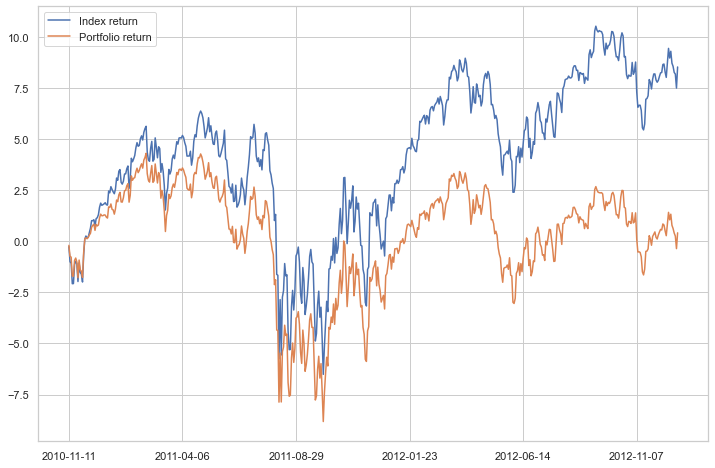

In [47]:
from Index_track import Portfolio_visualize
Portfolio_visualize(y_true,y_predict )

Out of sample Prediction evaluation

In [48]:
from sklearn.metrics import r2_score
print("R squared results", r2_score(y_true, y_predict))

R squared results 0.9734537915116845


In [49]:
from sklearn.metrics import mean_squared_error
print("Mean squared erorr", mean_squared_error(y_true, y_predict))

Mean squared erorr 0.0133863769599937


**out of sample evalution**

Based on the R squared value and Mean Squared error, we see that our prediction does very good job. But based on the graph, we see that our cumulative sum of predicted return is pretty good when the time is closer to the training set; once it gets farther away as time pass, the prediction is no longer as good. 

In [50]:
np.count_nonzero(w_B)

107

How many stocks have non-zero weights?

**Answer**: 107

In [51]:
non_zeros_experiment = [ ]
alphas = np.arange(0, 3, 0.01, dtype=float)

In [52]:
for t in alphas:    
    w_B, y_true , y_predict = Portfolio_construction(sp500_ret, alp = t)
    non_zeros_experiment.append(np.count_nonzero(w_B))

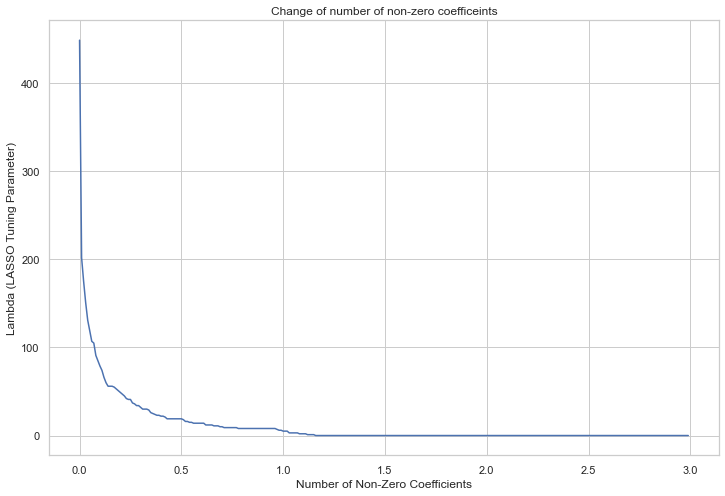

In [53]:
plt.plot(alphas, non_zeros_experiment)
plt.xlabel("Number of Non-Zero Coefficients")
plt.ylabel("Lambda (LASSO Tuning Parameter)")
plt.title("Change of number of non-zero coefficeints")
plt.show()

Try different tuning parameters to see how this changes the above question. 

What results do you find when tuning parameter = 0 / $\infty$?

**Answer**:

We see the number of non-zero coefficients decrease, just like how the theory would tell us. When we have tuning parameter = 0, all the features carry weight. When we have tuning parameter = $\infty$, all the features carry 0 weight. 

### Part 2. Rebalance the portfolio

In this exercise, we implement the above portfolio on a rolling window basis. Say, use the first 60-day window to train your model, and use the next 60 day as OOS to check its performance, and continue for the rest of the OOS periods. 


Finish the codes in Portfolio_rebalance() and run the cell below to construct and evalute this portfolio.

In [54]:
from Index_track import Portfolio_rebalance

In [55]:
sp500_ret.shape

(1341, 450)

In [56]:
p_weights, p_performance = Portfolio_rebalance(sp500_ret, 60)

In [57]:
p_performance.dropna()

,Predicted Value
Date,
2007-11-29,0.00769613
2007-11-30,0.433774
2007-12-03,-0.200211
2007-12-04,-0.109214
2007-12-05,0.877912
...,...
2012-12-24,-0.114662
2012-12-26,-0.263349
2012-12-27,-0.0816848


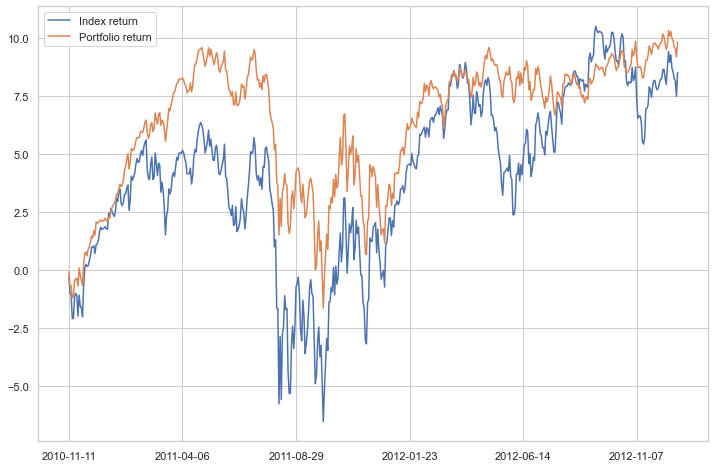

In [58]:
from Index_track import Portfolio_visualize
Portfolio_visualize(y_true,p_performance)

How many stocks have the non-zero weight? How stable is your portfolio? 

**Answer**:

We see that our rolling window approach provides a higher protfolio performance than the index return. Performancewise, it fluctuates with in similar trends as the index and is pretty stable. 

In [18]:
np.count_nonzero(p_weights)

592877

In [59]:
non_zero_stock = 0
for column in p_weights:
  
    if np.count_nonzero(p_weights[column].dropna()) >0 :
        non_zero_stock = non_zero_stock+1
print(non_zero_stock)

299


We see that through out our total iterations of rolling windows, 299 stocks has at least 1 time in our portflio that carries a weight that's non-zero. This makes sense as it implies the returns of the index are mostly driven by the very large stocks, which tends to be true since the S&P is value-weighted.